In [100]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [101]:
df  = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5749,5750,15770291,Allan,844,France,Female,29,8,0.00,2,0,0,147342.03,0
7972,7973,15806929,Ch'ien,751,Germany,Male,36,5,73194.99,1,1,1,89222.66,0
4450,4451,15791191,Mitchell,633,France,Male,59,2,103996.74,1,1,1,103159.11,0
2154,2155,15721426,Milne,606,Germany,Male,65,10,126306.64,3,0,0,7861.68,1
1661,1662,15806447,Mazzanti,690,Germany,Male,32,0,106683.52,2,1,1,137916.49,0


In [102]:
col_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df1 = df.drop(col_to_drop, axis = 1)
df1.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7901,628,Germany,Female,28,3,153538.13,2,1,0,110776.01,0
4463,850,Germany,Female,70,1,96947.58,3,1,0,62282.99,1
5615,520,France,Female,29,8,95947.76,1,1,0,4696.44,0
7980,497,Spain,Male,27,7,149400.27,1,0,0,167522.19,0
2690,648,Spain,Male,42,2,98795.61,2,1,0,89123.99,0
5873,598,France,Female,40,9,0.00,1,1,0,68462.59,1
8054,525,Germany,Female,47,1,118087.68,1,1,0,88120.78,1
5013,672,France,Female,40,3,0.00,1,1,0,113171.61,1
745,606,France,Male,40,5,0.00,2,1,1,70899.27,0
3970,509,France,Male,30,6,0.00,2,1,0,180598.86,0


In [103]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [104]:
def unique_col_values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col}: {df[col].unique()}')
unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [105]:
df2 = df1.copy()

In [106]:
df2['Gender'].replace({'Female':0, 'Male':1}, inplace = True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_4280\3121190721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Gender'].replace({'Female':0, 'Male':1}, inplace = True)
C:\Users\MSI\AppData\Local\Temp\ipykernel_4280\3121190721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Gender'].repl

In [110]:

df2 = pd.get_dummies(data = df2, columns = ['Geography']).astype(float)


df2.sample(5)                                  

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6185,699.0,1.0,36.0,6.0,147137.74,1.0,1.0,1.0,33687.90,0.0,0.0,1.0,0.0
9591,708.0,1.0,40.0,8.0,83015.71,1.0,1.0,0.0,101089.76,0.0,0.0,0.0,1.0
2107,646.0,0.0,42.0,3.0,99836.47,1.0,0.0,1.0,22909.56,0.0,0.0,0.0,1.0
8672,706.0,1.0,38.0,1.0,0.00,2.0,1.0,0.0,122379.54,0.0,1.0,0.0,0.0
7062,597.0,0.0,41.0,4.0,145809.53,2.0,1.0,1.0,52319.26,0.0,1.0,0.0,0.0


In [112]:
df2.dtypes

CreditScore          float64
Gender               float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Exited               float64
Geography_France     float64
Geography_Germany    float64
Geography_Spain      float64
dtype: object

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6958,0.658,1.0,0.202703,0.4,0.383065,0.000000,1.0,0.0,0.005809,0.0,0.0,0.0,1.0
9887,0.668,1.0,0.081081,0.8,0.572276,0.000000,1.0,1.0,0.112589,0.0,0.0,0.0,1.0
9473,0.516,1.0,0.364865,0.4,0.000000,0.333333,0.0,0.0,0.183447,1.0,0.0,0.0,1.0
7708,0.272,0.0,0.283784,0.8,0.389877,0.000000,0.0,1.0,0.602656,0.0,1.0,0.0,0.0
3727,0.862,0.0,0.121622,0.7,0.743563,0.000000,1.0,1.0,0.875382,1.0,1.0,0.0,0.0
6250,0.516,1.0,0.324324,1.0,0.651851,0.000000,1.0,0.0,0.194295,0.0,1.0,0.0,0.0
2247,0.490,0.0,0.310811,0.2,0.553527,0.000000,0.0,1.0,0.561344,0.0,0.0,1.0,0.0
3816,0.628,0.0,0.175676,0.9,0.456439,0.333333,0.0,1.0,0.396090,0.0,1.0,0.0,0.0
1804,0.404,1.0,0.202703,0.5,0.561708,0.000000,0.0,1.0,0.054555,0.0,1.0,0.0,0.0
9698,0.858,1.0,0.418919,0.9,0.423121,0.000000,0.0,0.0,0.584467,0.0,1.0,0.0,0.0


In [116]:
X = df2.drop('Exited', axis = 1)
y = df2['Exited']

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
X_test.shape

(2000, 12)

In [122]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',b
    metrics = ['accuracy']
)
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10


D:\Anaconda__\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5346 - loss: 0.6766   
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 0.4946  
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.4761  
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8036 - loss: 0.4622  
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8026 - loss: 0.4590  
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8063 - loss: 0.4450  
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8056 - loss: 0.4473  
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8080 - loss: 0.4407  
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8187 - loss: 0.4195
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 0.4259


In [128]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8174 - loss: 0.4101  


[0.41890352964401245, 0.8224999904632568]

In [130]:
yp = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [132]:
yp[:5]

array([[0.23266049],
       [0.39114076],
       [0.13850574],
       [0.11438756],
       [0.10105953]], dtype=float32)

In [138]:
y_pred = []
for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(y_test[:10])
y_pred[:10]


9394    0.0
898     1.0
2398    0.0
5906    0.0
2343    0.0
8225    1.0
5506    0.0
6451    0.0
2670    1.0
3497    1.0
Name: Exited, dtype: float64


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      1595
         1.0       0.73      0.20      0.31       405

    accuracy                           0.82      2000
   macro avg       0.78      0.59      0.60      2000
weighted avg       0.81      0.82      0.78      2000



[]

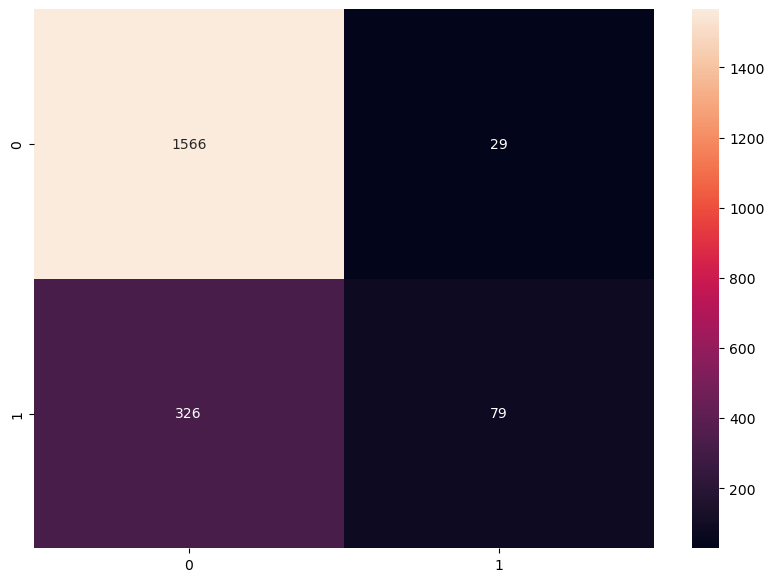

In [144]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sn

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, fmt = 'd', annot = True)
plt.plot()